In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import PIL.ImageOps
import cv2
from tqdm import tqdm
import pickle

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, Activation, Flatten, BatchNormalization
import tensorflow.keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import time

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Train Images

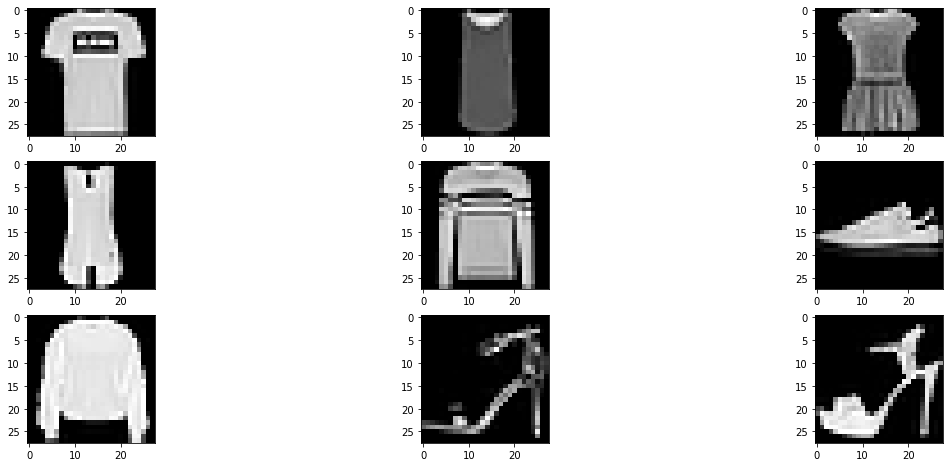

In [8]:
plt.figure(figsize=(20, 8))

for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(X_train[i], cmap='gray')

# Test Images

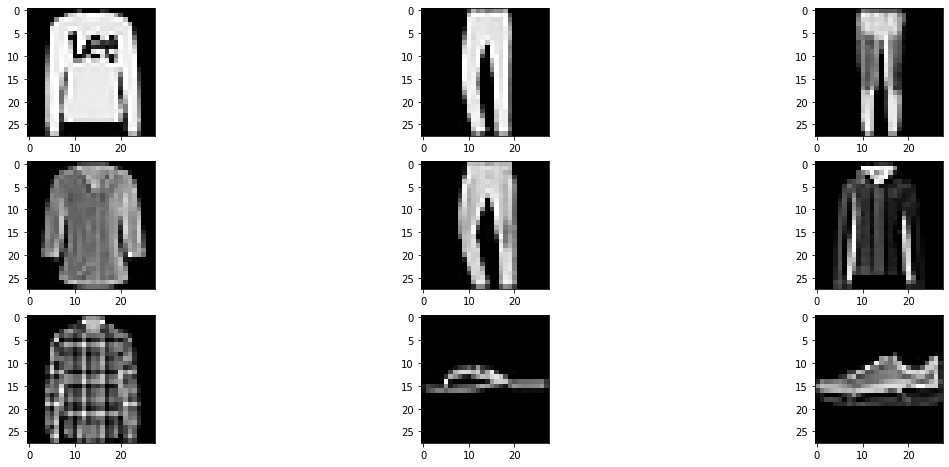

In [9]:
plt.figure(figsize=(20, 8))

for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(X_test[i], cmap='gray')

In [3]:
path = '/content/drive/My Drive/Google_Colab/Vans_Image_Classifier'
os.chdir(path)

Label Description

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [4]:
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Model Building

## Simple Model

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(2, 2), padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(2, 2), padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       3

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32,
          epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 10.0240 - accuracy: 0.1018 - val_loss: 9.9930 - val_accuracy: 0.1003
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 9.9954 - accuracy: 0.1003 - val_loss: 9.9934 - val_accuracy: 0.0997
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9938 - accuracy: 0.0990 - val_loss: 9.9932 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 9.9935 - accuracy: 0.1011 - val_loss: 9.9930 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9929 - accuracy: 0.1028 - val_loss: 9.9929 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9930 - accuracy: 0.1011 - val_loss: 9.9929 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9929 - accuracy: 0.1009 - val_loss: 9.9929 - val_accuracy

In [ ]:
y_pred = model.predict(X_test)
labels[np.argsort(y_pred[0])[-1]]

'Ankle boot'

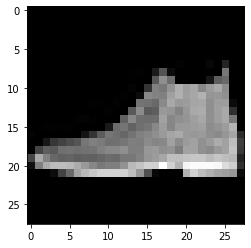

In [ ]:
plt.imshow(X_test[0][:, :, 0], cmap='gray')

That is a high top shoe, not a T-shirt/ Top!

## Iterating Through Models

In [ ]:
layer_sizes = [32, 64, 128]
dense_layers = [0, 1, 2]
convolution_layers = [2, 3]



for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in convolution_layers:

      model_name = f'{conv_layer}-conv-{layer_size}-neurons-{dense_layer}-dense'
      print(model_name)

      model = Sequential()

      model.add(Conv2D(layer_size, (3, 3), activation='relu'))
      model.add(BatchNormalization())
      model.add(MaxPool2D((2, 2), padding='same'))

      for i in range(conv_layer-1):
        model.add(Conv2D(layer_size, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D((2, 2)))

      model.add(Flatten())

      for i in range(dense_layer):
        model.add(Dense(layer_size, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

      model.add(Dense(10, activation='softmax'))

      model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

      early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min', min_delta=0.3)
      tensorboard = TensorBoard('logs/{}'.format(model_name))

      model.fit(X_train, y_train, batch_size=64, epochs=10, 
                callbacks=[early_stop, tensorboard], validation_data=(X_test, y_test))

2-conv-32-neurons-0-dense
Epoch 1/10
  1/938 [..............................] - ETA: 0s - loss: 4.1590 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
938/938 [==============================] - 7s 7ms/step - loss: 0.4451 - accuracy: 0.8418 - val_loss: 0.3629 - val_accuracy: 0.8708
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3070 - accuracy: 0.8905 - val_loss: 0.3250 - val_accuracy: 0.8864
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2732 - accuracy: 0.9018 - val_loss: 0.3290 - val_accuracy: 0.8822
3-conv-32-neurons-0-dense
Epoch 1/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5245 - accuracy: 0.8133 - val_loss: 0.4324 - val_accuracy: 0.8432
Epoch 2/10
938/938

After viewing with tensorboard by typing tensorboard --logdir=logs/ in the command line, I determined the two models that performed the best were 2-conv-128-neurons-2-dense and 2-conv-256-neurons-2-dense

## Optimal Models

In [ ]:
model_2_conv_128_n_2_dense = Sequential()

model_2_conv_128_n_2_dense.add(Conv2D(128, (3, 3), activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(MaxPool2D((2, 2)))
model_2_conv_128_n_2_dense.add(Dropout(0.5))

model_2_conv_128_n_2_dense.add(Conv2D(128, (3, 3), activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(MaxPool2D((2, 2)))
model_2_conv_128_n_2_dense.add(Dropout(0.5))

model_2_conv_128_n_2_dense.add(Flatten())

model_2_conv_128_n_2_dense.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_2_conv_128_n_2_dense.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
                                     metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)

In [ ]:
model_2_conv_128_n_2_dense.fit(X_train, y_train, batch_size=64, epochs=20,
                               validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 13s 14ms/step - loss: 1.0718 - accuracy: 0.6890 - val_loss: 0.4974 - val_accuracy: 0.8262
Epoch 2/20
938/938 [==============================] - 13s 14ms/step - loss: 0.6530 - accuracy: 0.7915 - val_loss: 0.4429 - val_accuracy: 0.8463
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.5408 - accuracy: 0.8223 - val_loss: 0.3973 - val_accuracy: 0.8618
Epoch 4/20
938/938 [==============================] - 13s 14ms/step - loss: 0.4721 - accuracy: 0.8416 - val_loss: 0.3679 - val_accuracy: 0.8698
Epoch 5/20
938/938 [==============================] - 13s 14ms/step - loss: 0.4231 - accuracy: 0.8547 - val_loss: 0.3363 - val_accuracy: 0.8790
Epoch 6/20
938/938 [==============================] - 13s 14ms/step - loss: 0.3961 - accuracy: 0.8625 - val_loss: 0.3446 - val_accuracy: 0.8743
Epoch 7/20
938/938 [==============================] - 13s 14ms/step - loss: 0.3700 - accuracy: 0.8702 - val_loss: 0.3389 - val_accuracy:

In [ ]:
model_2_conv_256_n_2_dense = Sequential()

model_2_conv_256_n_2_dense.add(Conv2D(256, (3,3), activation='relu'))
model_2_conv_256_n_2_dense.add(BatchNormalization())
model_2_conv_256_n_2_dense.add(MaxPool2D((2, 2), padding='same'))
model_2_conv_256_n_2_dense.add(Dropout(0.3))

model_2_conv_256_n_2_dense.add(Conv2D(256, (3,3), activation='relu'))
model_2_conv_256_n_2_dense.add(BatchNormalization())
model_2_conv_256_n_2_dense.add(MaxPool2D((2,2)))
model_2_conv_256_n_2_dense.add(Dropout(0.3))

model_2_conv_256_n_2_dense.add(Flatten())

model_2_conv_256_n_2_dense.add(Dense(256, activation='relu'))
model_2_conv_256_n_2_dense.add(BatchNormalization())
model_2_conv_256_n_2_dense.add(Dropout(0.3))

model_2_conv_256_n_2_dense.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)

model_2_conv_256_n_2_dense_opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_2_conv_256_n_2_dense.compile(optimizer=model_2_conv_256_n_2_dense_opt,
                                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_2_conv_256_n_2_dense.fit(X_train, y_train, batch_size=64, epochs=20,
                               validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 26s 28ms/step - loss: 0.5735 - accuracy: 0.7980 - val_loss: 0.3785 - val_accuracy: 0.8625
Epoch 2/20
938/938 [==============================] - 26s 27ms/step - loss: 0.3846 - accuracy: 0.8620 - val_loss: 0.3395 - val_accuracy: 0.8756
Epoch 3/20
938/938 [==============================] - 26s 27ms/step - loss: 0.3266 - accuracy: 0.8821 - val_loss: 0.2932 - val_accuracy: 0.8932
Epoch 4/20
938/938 [==============================] - 26s 27ms/step - loss: 0.2951 - accuracy: 0.8933 - val_loss: 0.2892 - val_accuracy: 0.8915
Epoch 5/20
938/938 [==============================] - 26s 27ms/step - loss: 0.2684 - accuracy: 0.9022 - val_loss: 0.2586 - val_accuracy: 0.9058
Epoch 6/20
938/938 [==============================] - 26s 27ms/step - loss: 0.2431 - accuracy: 0.9111 - val_loss: 0.2458 - val_accuracy: 0.9128
Epoch 7/20
938/938 [==============================] - 26s 27ms/step - loss: 0.2305 - accuracy: 0.9153 - val_loss: 0.2382 - val_accuracy:

In [ ]:
X_train.shape

(60000, 28, 28, 1)

# Importing Images from Vans

In [5]:
def load_images(abs_path, data_folder, img_height, img_width, img_depth, color,
                invert=False, normalize=False):

  data_path = os.path.join(abs_path, data_folder)
  os.chdir(data_path)

  df = pd.DataFrame(columns=['img_id', 'label'])
  for folder in os.listdir():
    folder_path = os.path.join(data_path, folder)
    os.chdir(folder_path)

    for images in os.listdir():
      df_2 = pd.DataFrame([[images, folder]], columns=['img_id', 'label'])
      df = df.append(df_2)
    
    os.chdir('..')

  X = []

  for folder in tqdm(os.listdir()):
    folder_path = os.path.join(data_path, folder)
    os.chdir(folder_path)

    for images in os.listdir():
      img_path = os.path.join(folder_path, images)
      img = image.load_img(img_path, target_size=(img_height, img_width, img_depth), color_mode=color)
      if invert:
        img = PIL.ImageOps.invert(img)
      img = image.img_to_array(img)
      if normalize:
        img /= 255.0
      X.append(img)

  X = np.array(X)

  df['label'] = df['label'].map({'T-shirt': 0, 'pants': 1, 'pullovers': 2,
                               'dress': 3, 'coats': 4, 'sandals': 5,
                               'long_sleeve_shirt': 6, 'sneakers': 7,
                               'Bag': 8, 'High Tops': 9})
  y = df['label'].reset_index(drop=True)

  return X, y

In [17]:
X_val, y_val = load_images(path, 'data', 28, 28, 3, 'rgb', True, True)

100%|██████████| 10/10 [02:24<00:00, 14.42s/it]


# Vans Validation Images

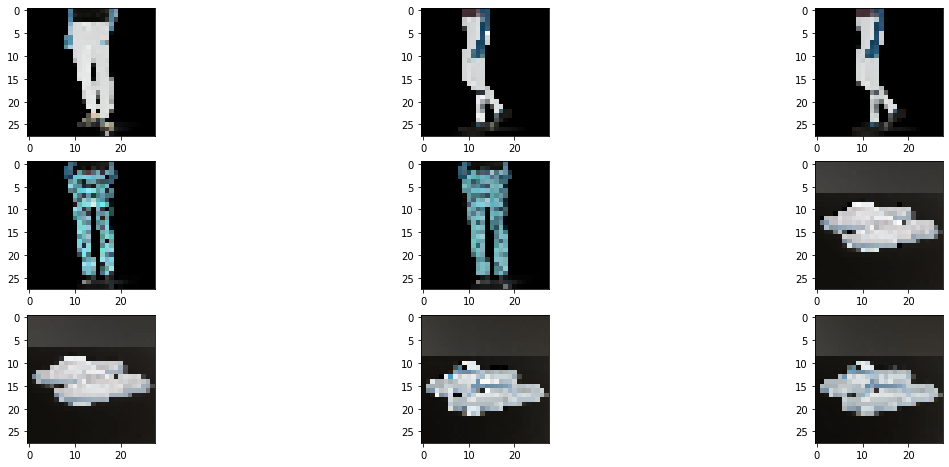

In [19]:
plt.figure(figsize=(20, 8))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(X_val[i])

## Predicting Products with Models

In [ ]:
y_pred_test = model_2_conv_128_n_2_dense.predict(X_val)

In [ ]:
labels[np.argsort(y_pred_test[102])[-1]]

'Sneaker'

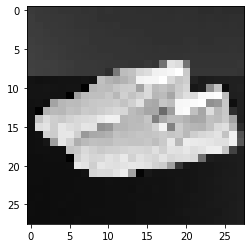

In [ ]:
plt.imshow(X_val[102][:, :, 0], cmap='gray')

In [ ]:
y_pred_test_256 = model_2_conv_256_n_2_dense.predict(X_val)

In [ ]:
labels[np.argsort(y_pred_test_256[484])[-1]]

'T-shirt/top'

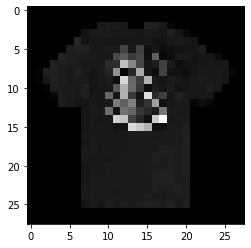

In [ ]:
plt.imshow(X_val[484][:, :, 0], cmap='gray')

## Model Evaluation

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
predictions_128_model = [np.argsort(i)[-1] for i in y_pred_test]

predictions_256_model = [np.argsort(i)[-1] for i in y_pred_test_256]

In [6]:
def plot_confusion_matrix(cm, classes, figname, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
 """
 This function prints and plots the confusion matrix.
 Normalization can be applied by setting `normalize=True`.
 """
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 import seaborn as sns
 if normalize:
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')

  sns.set_style('dark')

  plt.figure(figsize=(8,8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  #plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment='center',
    color='white' if cm[i, j] > thresh else 'black')
  
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.savefig(figname)

In [ ]:
cm_128 = confusion_matrix(y_val, predictions_128_model)
plot_confusion_matrix(cm_128, classes=labels.values(), figname='Confusion_matrix_concrete.jpg',
                      normalize=False, title='128 Neuron Model Confusion Matrix')

In [ ]:
print('128 Neuron Classification Report')
print(classification_report(y_val, predictions_128_model))

128 Neuron Classification Report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        62
           1       0.43      1.00      0.60         6
           2       0.04      0.15      0.06        13
           3       0.00      0.00      0.00         0
           4       0.12      0.50      0.20         8
           5       0.00      0.00      0.00         8
           6       0.40      0.24      0.30        51
           7       0.81      0.72      0.76       422
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        91

    accuracy                           0.57       661
   macro avg       0.26      0.34      0.27       661
weighted avg       0.63      0.57      0.59       661



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


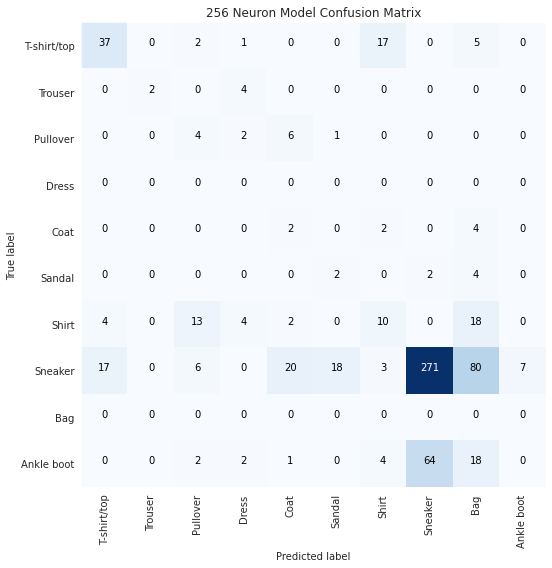

In [ ]:
cm_256 = confusion_matrix(y_val, predictions_256_model)
plot_confusion_matrix(cm_256, classes=labels.values(), figname='Confusion_matrix_concrete.jpg',
                      normalize=False, title='256 Neuron Model Confusion Matrix')

In [ ]:
print('256 Neuron Classification Report')
print(classification_report(y_val, predictions_256_model))

256 Neuron Classification Report
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        62
           1       1.00      0.33      0.50         6
           2       0.15      0.31      0.20        13
           3       0.00      0.00      0.00         0
           4       0.06      0.25      0.10         8
           5       0.10      0.25      0.14         8
           6       0.28      0.20      0.23        51
           7       0.80      0.64      0.71       422
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        91

    accuracy                           0.50       661
   macro avg       0.30      0.26      0.25       661
weighted avg       0.61      0.50      0.54       661



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It looks like the 128 neuron model did a decent job of correctly predicting the product class. It seems as if 57% of our predictions are correct with this model for data it has never seen before. It did a very good job predicting which images were sneakers, however it struggled with predicting ankle boots, predicting almost all over them as sneakers.

## Fine Tuning Model

In [ ]:
model_2_conv_128_n_2_dense = Sequential()

model_2_conv_128_n_2_dense.add(Conv2D(128, (3, 3), activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(MaxPool2D((2, 2), padding='same'))
model_2_conv_128_n_2_dense.add(Dropout(0.3))

model_2_conv_128_n_2_dense.add(Conv2D(128, (3, 3), activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(MaxPool2D((2, 2), strides=(2, 1)))
model_2_conv_128_n_2_dense.add(Dropout(0.2))

model_2_conv_128_n_2_dense.add(Flatten())

model_2_conv_128_n_2_dense.add(Dense(128, activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(Dropout(0.2))

model_2_conv_128_n_2_dense.add(Dense(64, activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(Dropout(0.2))

model_2_conv_128_n_2_dense.add(Dense(32, activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())

model_2_conv_128_n_2_dense.add(Dense(16, activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(Dropout(0.2))

model_2_conv_128_n_2_dense.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_2_conv_128_n_2_dense.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
                                     metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [ ]:
model_2_conv_128_n_2_dense.fit(X_train, y_train, batch_size=64,
                               validation_data=(X_val, y_val), callbacks=[early_stopping])

938/938 [==============================] - 17s 18ms/step - loss: 1.1964 - accuracy: 0.6345 - val_loss: 1.8356 - val_accuracy: 0.4691


In [ ]:
new_prediction = model_2_conv_128_n_2_dense.predict(X_val)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Confusion matrix, without normalization


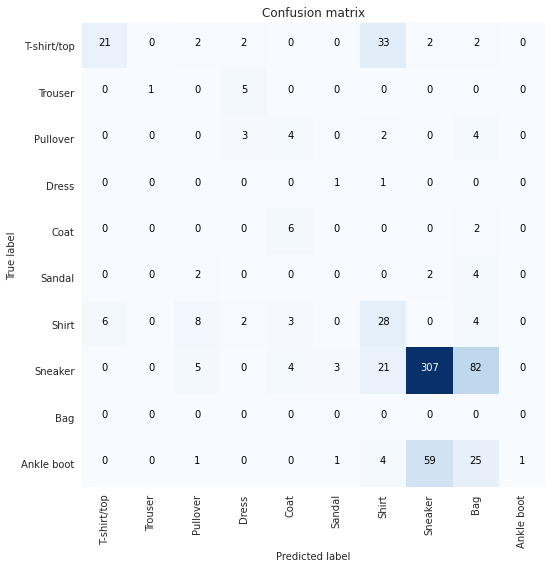

In [ ]:
new_predictions = [np.argsort(i)[-1] for i in new_prediction]

cm = confusion_matrix(y_val, new_predictions)
plot_confusion_matrix(cm, classes=labels.values(), figname='Updated Predictions')

In [ ]:
print(classification_report(y_val, new_predictions))

              precision    recall  f1-score   support

           0       0.78      0.34      0.47        62
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         2
           4       0.35      0.75      0.48         8
           5       0.00      0.00      0.00         8
           6       0.31      0.55      0.40        51
           7       0.83      0.73      0.78       422
           8       0.00      0.00      0.00         0
           9       1.00      0.01      0.02        91

    accuracy                           0.55       663
   macro avg       0.43      0.25      0.24       663
weighted avg       0.78      0.55      0.58       663



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scores = model_2_conv_128_n_2_dense.evaluate(X_val, y_val)
print('Test Loss: {}'.format(scores[0]))
print('Test Accuracy: %0.4f' % (scores[1]))

21/21 [==============================] - 0s 3ms/step - loss: 1.8098 - accuracy: 0.5490
Test Loss: 1.8098013401031494
Test Accuracy: 0.5490


## Applying Image Augmentation to Training Images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=[-100, 100], height_shift_range=[-100, 100],
                             shear_range=0.3, zoom_range=[0.5, 1.0],
                             horizontal_flip=True)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3, min_delta=0.1)

datagen.fit(X_train)

In [ ]:
batch_size = 200
opt = tf.keras.optimizers.Adam(learning_rate=0.000001)

model_2_conv_128_n_2_dense.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
                                     metrics=['accuracy'])

model_2_conv_128_n_2_dense.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), 
                                         steps_per_epoch= X_train.shape[0] / batch_size,
                                         epochs=20, validation_data=(X_val, y_val),
                                         callbacks=[early_stopping])

Epoch 1/20
300/300 [==============================] - 30s 101ms/step - loss: 2.3412 - accuracy: 0.1885 - val_loss: 25.9195 - val_accuracy: 0.0045
Epoch 2/20
300/300 [==============================] - 30s 102ms/step - loss: 2.3399 - accuracy: 0.1776 - val_loss: 40.4448 - val_accuracy: 0.0045
Epoch 3/20
300/300 [==============================] - 30s 100ms/step - loss: 2.3328 - accuracy: 0.1688 - val_loss: 41.6422 - val_accuracy: 0.0060
Epoch 4/20
300/300 [==============================] - 30s 101ms/step - loss: 2.3327 - accuracy: 0.1614 - val_loss: 42.5712 - val_accuracy: 0.0060


In [ ]:
test = model_2_conv_128_n_2_dense.predict(X_val)

In [ ]:
test_scores = model_2_conv_128_n_2_dense.evaluate(X_val, y_val)
print('Test Loss: {}'.format(test_scores[0]))
print('Test Accuracy: %0.4f' % (test_scores[1]))

21/21 [==============================] - 0s 6ms/step - loss: 11.2179 - accuracy: 0.0000e+00
Test Loss: 11.21789264678955
Test Accuracy: 0.0000


In [ ]:
model_2_conv_128_n_2_dense.fit(X_train, y_train, batch_size=350, epochs=20, 
                               validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
172/172 [==============================] - 11s 64ms/step - loss: 1.0191 - accuracy: 0.1371 - val_loss: 2.9729 - val_accuracy: 0.1041
Epoch 2/20
172/172 [==============================] - 11s 62ms/step - loss: 0.4405 - accuracy: 0.1088 - val_loss: 2.3547 - val_accuracy: 0.3424
Epoch 3/20
172/172 [==============================] - 11s 62ms/step - loss: 0.3338 - accuracy: 0.1018 - val_loss: 1.9543 - val_accuracy: 0.1584
Epoch 4/20
172/172 [==============================] - 11s 61ms/step - loss: 0.2914 - accuracy: 0.1019 - val_loss: 2.7548 - val_accuracy: 0.1735
Epoch 5/20
172/172 [==============================] - 11s 61ms/step - loss: 0.2619 - accuracy: 0.1009 - val_loss: 3.0099 - val_accuracy: 0.6591
Epoch 6/20
172/172 [==============================] - 11s 62ms/step - loss: 0.2431 - accuracy: 0.1010 - val_loss: 2.3870 - val_accuracy: 0.4691


Data Augmentation didn't help the model at all in this situation, in fact the model performed way worse after data augmentation.

## Using Transfer Learning

I will try to use Transfer Learning from a pre-trained model to see if I can achieve better predictive results on the validation data.

In [8]:
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img

In [10]:
img_height = 128
img_width = 128
img_depth = 3
batch_size = 64

In [34]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [35]:
X_val, y_val = load_images(path, 'data', 48, 48, 3, 'rgb', True, False)

100%|██████████| 10/10 [00:01<00:00,  5.50it/s]


In [36]:
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)
y_val = tensorflow.keras.utils.to_categorical(y_val)

In [37]:
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train), name=None)
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test), name=None)

In [39]:
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])

In [41]:
X_train_processed = preprocess_input(X_train)
X_test_processed = preprocess_input(X_test)
X_val_processed = preprocess_input(X_val)

In [42]:
X_train_processed /= 255.0
X_test_processed /= 255.0
X_val_processed /= 255.0

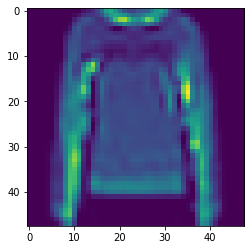

In [43]:
plt.imshow(X_train_processed[400][:, :, 0])

In [44]:
base = MobileNetV2(weights='imagenet', include_top=False,
             input_shape=(img_width, img_height, img_depth))
base.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [27]:
from keras.engine import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [53]:
last = base.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(base.layers[0].output, x)

for layer in model.layers[:150]:
  layer.trainiable = False
for layer in model.layers[150:]:
  layer.trainable = True

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________________

In [54]:
model.fit(X_train_processed, y_train, batch_size=100, epochs=10,
          validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
600/600 [==============================] - 29s 48ms/step - loss: 0.1975 - accuracy: 0.9405 - val_loss: 0.3679 - val_accuracy: 0.9063
Epoch 2/10
600/600 [==============================] - 28s 46ms/step - loss: 0.1351 - accuracy: 0.9545 - val_loss: 0.5290 - val_accuracy: 0.8961
Epoch 3/10
600/600 [==============================] - 28s 46ms/step - loss: 0.1273 - accuracy: 0.9576 - val_loss: 0.5568 - val_accuracy: 0.8763
Epoch 4/10
600/600 [==============================] - 28s 46ms/step - loss: 0.1114 - accuracy: 0.9633 - val_loss: 0.4647 - val_accuracy: 0.8677


In [58]:
print(f'Model Accuracy of Test Data: {model.evaluate(X_test, y_test, verbose=0)[1]}')
print(f'Model Accuracy of Validation Data: {model.evaluate(X_val, y_val, verbose=0)[1]}')

313/313 [==============================] - 3s 9ms/step - loss: 0.4647 - accuracy: 0.8677
Model Accuracy of Test Data: 0.8676999807357788
21/21 [==============================] - 0s 8ms/step - loss: 3.0333 - accuracy: 0.4699
Model Accuracy of Validation Data: 0.46987950801849365


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Confusion matrix, without normalization


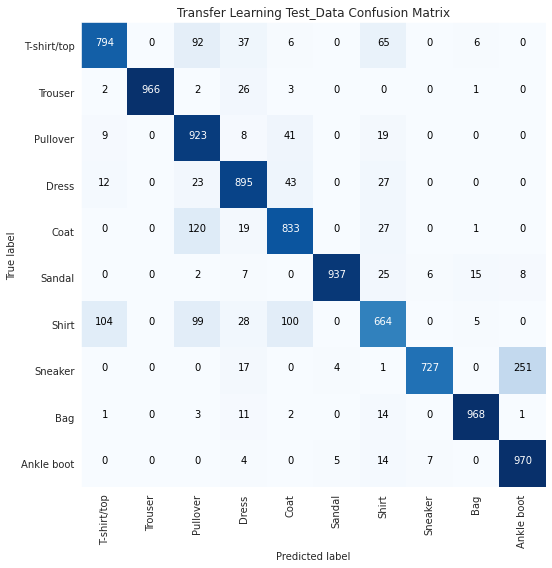

In [59]:
test_transfer_pred = model.predict(X_test)
test_transfer_pred = [np.argsort(i)[-1] for i in test_transfer_pred]
y_test_cat = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_cat, test_transfer_pred)

plot_confusion_matrix(cm, classes=labels.values(), figname='Confusion_matrix_transfer_learning.jpg',
                      normalize=False, title='Transfer Learning Test_Data Confusion Matrix')

In [61]:
print(classification_report(y_test_cat, test_transfer_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.73      0.92      0.82      1000
           3       0.85      0.90      0.87      1000
           4       0.81      0.83      0.82      1000
           5       0.99      0.94      0.96      1000
           6       0.78      0.66      0.72      1000
           7       0.98      0.73      0.84      1000
           8       0.97      0.97      0.97      1000
           9       0.79      0.97      0.87      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



Confusion matrix, without normalization


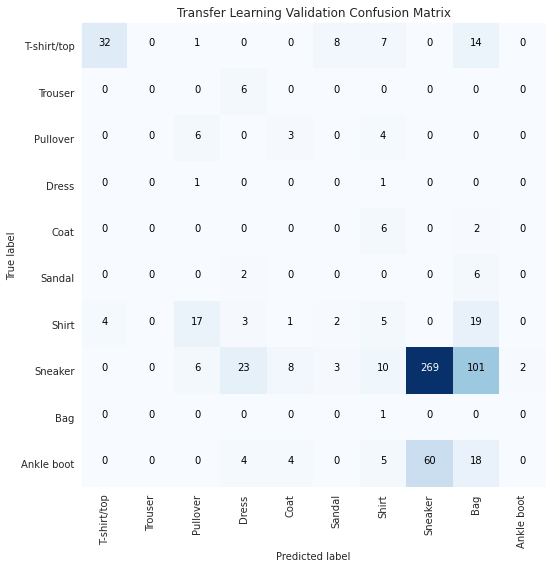

In [63]:
val_transfer_pred = model.predict(X_val)
val_transfer_pred = [np.argsort(i)[-1] for i in val_transfer_pred]
y_val_cat = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_val_cat, val_transfer_pred)


plot_confusion_matrix(cm, classes=labels.values(), figname='Confusion_matrix_transfer_learning.jpg',
                      normalize=False, title='Transfer Learning Validation Confusion Matrix')

In [64]:
print(classification_report(y_val_cat, val_transfer_pred))

              precision    recall  f1-score   support

           0       0.89      0.52      0.65        62
           1       0.00      0.00      0.00         6
           2       0.19      0.46      0.27        13
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.13      0.10      0.11        51
           7       0.82      0.64      0.72       422
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        91

    accuracy                           0.47       664
   macro avg       0.20      0.17      0.18       664
weighted avg       0.62      0.47      0.53       664



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training the last CNN block in the ModelNet_V2 model

In [65]:
# I decided to try and train up the last 55 layers of the ModelNet architecture, and leave the initial 100 layers untrained.
for layer in model.layers[:100]:
  layer.trainable = False
for layer in model.layers[100:]:
  layer.trainable = True

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model.fit(X_train_processed, y_train, batch_size=100, epochs=10,
          validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0934 - categorical_accuracy: 0.9696 - val_loss: 3.3111 - val_categorical_accuracy: 0.5843
Epoch 2/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0783 - categorical_accuracy: 0.9729 - val_loss: 3.0192 - val_categorical_accuracy: 0.5798
Epoch 3/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0708 - categorical_accuracy: 0.9754 - val_loss: 3.1261 - val_categorical_accuracy: 0.5813
Epoch 4/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0659 - categorical_accuracy: 0.9765 - val_loss: 3.0377 - val_categorical_accuracy: 0.5798
Epoch 5/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0636 - categorical_accuracy: 0.9773 - val_loss: 3.1110 - val_categorical_accuracy: 0.5738


Confusion matrix, without normalization


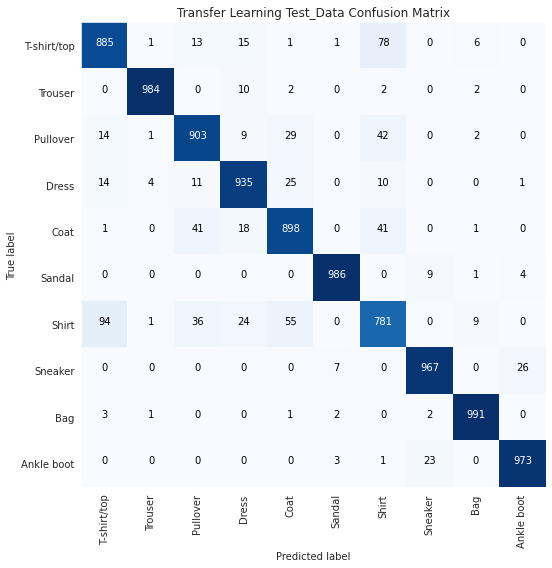

In [75]:
test_transfer_pred = model.predict(X_test)
test_transfer_pred = [np.argsort(i)[-1] for i in test_transfer_pred]
y_test_cat = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_cat, test_transfer_pred)

plot_confusion_matrix(cm, classes=labels.values(), figname='Confusion_matrix_transfer_learning.jpg',
                      normalize=False, title='Transfer Learning Test_Data Confusion Matrix')

In [74]:
print(classification_report(y_test_cat, test_transfer_pred))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1000
           1       1.00      0.96      0.98      1000
           2       0.88      0.83      0.85      1000
           3       0.91      0.92      0.91      1000
           4       0.93      0.79      0.86      1000
           5       0.99      0.95      0.97      1000
           6       0.60      0.92      0.73      1000
           7       0.97      0.95      0.96      1000
           8       0.95      0.99      0.97      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



Confusion matrix, without normalization


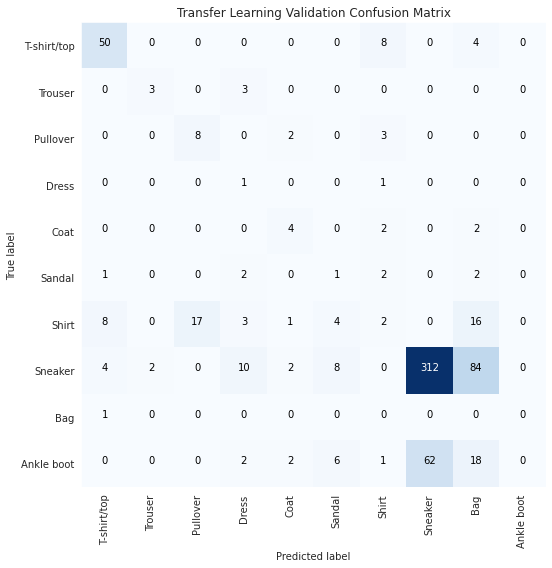

In [77]:
val_transfer_pred = model.predict(X_val)
val_transfer_pred = [np.argsort(i)[-1] for i in val_transfer_pred]
y_val_cat = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_val_cat, val_transfer_pred)


plot_confusion_matrix(cm, classes=labels.values(), figname='Confusion_matrix_transfer_learning.jpg',
                      normalize=False, title='Transfer Learning Validation Confusion Matrix')

In [78]:
print(classification_report(y_val_cat, val_transfer_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        62
           1       0.60      0.50      0.55         6
           2       0.32      0.62      0.42        13
           3       0.05      0.50      0.09         2
           4       0.36      0.50      0.42         8
           5       0.05      0.12      0.07         8
           6       0.11      0.04      0.06        51
           7       0.83      0.74      0.78       422
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        91

    accuracy                           0.57       664
   macro avg       0.31      0.38      0.32       664
weighted avg       0.63      0.57      0.60       664



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
